# Writing a video using OpenCV

## Importing the libraries

In [55]:
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML

%matplotlib inline

## Download Assets

In [56]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assets...", end="")

    # Downloading zip file using urllib package
    urlretrieve(url, save_path)

    try:
        # Extracting zipfile using the zipfile package
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [57]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

## Read Video from Source

In [58]:
source = 'race_car.mp4' # source = 0 for webcam

cap = cv2.VideoCapture(source)

In [59]:
if not cap.isOpened():
    print("Error opening video stream or file")

### Read and display one frame

In [60]:
ret, frame = cap.read()

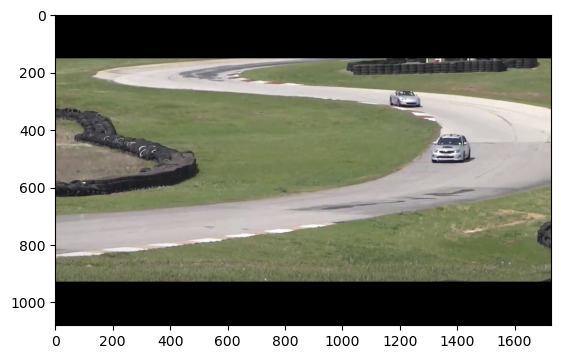

In [61]:
plt.imshow(frame[..., ::-1])

### Display the video file

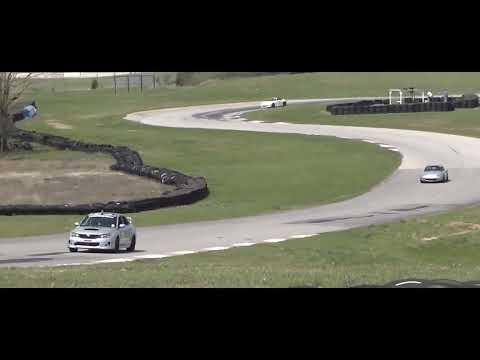

In [62]:
video = YouTubeVideo("RwxVEjv78LQ", width=700, height=438)
display(video)

## Write Video using OpenCV

In [63]:
# Default resolutions of the frame are obtained
# Convert the resolutions from float to integer

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object
out_avi = cv2.VideoWriter("race_car_out.avi", cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 10, (frame_width, frame_height))

out_mp4 = cv2.VideoWriter("race_car_out2.mp4", cv2.VideoWriter_fourcc(*'XVID'), 10, (frame_width, frame_height))

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


### Read frames and write to file

In [64]:
# Read until video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret:
        out_avi.write(frame)
        out_mp4.write(frame)

    # Break the loop
    else:
        break

In [65]:
# When everything done, release the VideoCapture and VideoWriter objects
cap.release()
out_avi.release()
out_mp4.release()

To display video on Google Colab, we will install and use the ffmpeg package. Using ffmpeg we will change the encoding of the .mp4 file from XVID to H264

HTML 5 can properly render videos with H264 encoding and OpenCV doesn't have that encoding yet. That's why we need to change their encodings such that they can be rendered.

In [66]:
!ffmpeg -y -i "race_car_out2.mp4" -c:v libx264 "race_car_out_x264.mp4" -hide_banner -loglevel error


# Installing ffmpeg

!apt-get -qq install ffmpeg 
Currently, HTML5 only suports renedering of MP4 files, so we'll only change the encoding of the race_car_out.mp4 file.


Render mp4 video

In [67]:
from base64 import b64encode

mp4 = open("race_car_out_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=700 controls><source src="{data_url}" type="video/mp4"></video>""")